# **Importing Libraries**

In [1]:
# Basics Library
import numpy as np
import pandas as pd

# For Visulization 
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessig for Data Encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler

# For split data in train and test part , And GridSearchCV other use for Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,RandomizedSearchCV

# confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier")
from sklearn.metrics import confusion_matrix,classification_report

#  ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).  
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,plot_precision_recall_curve

# Use Diff Classifier for Model Learning
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from pprint import pprint
# Use For Handle Imbalance Class Problem
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE


# **Genral Functions** 




*   **plot_roc_curve_many**

> > parameters: fpr,tpr,models 
> > ###### This function take list of False positive rate, true positive rate and models on which we draw ROC curves to visualize the results of models

*  **plot_roc_curve**
>> parameters: fpr,tpr
> > ##### its draw roc curve for single model on given fpr,tpr

* **evaluateModel**
>> parameters: model
>> ##### this method evaluate the method give fpr,tpr,thr 

In [22]:
def plot_roc_curve_many(fpr,tpr,models):
  print("Collective ROC Curve")
  plt.figure(figsize=(20,10))
  plt.plot([0,1],[0,1], color='blue',linestyle='--')
  for idx in range(0,len(models)):
    plt.plot(fpr[idx],tpr[idx],label='ROC '+models[idx])  
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

  
names = ["Nearest Neighbors","Logistic Regression", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='lbfgs'),
    SVC(kernel="linear", C=0.025,probability=True),
    SVC(gamma=2, C=1,probability=True),
    DecisionTreeClassifier(max_depth=5,random_state=0),
    RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]


names_1 = ["Logistic Regression", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest"]
classifiers_1 = [
    LogisticRegression(solver='lbfgs',class_weight="balanced"),
    SVC(kernel="linear", C=0.025,probability=True,class_weight="balanced"),
    SVC(gamma=2, C=1,probability=True,class_weight="balanced"),
    DecisionTreeClassifier(max_depth=5,random_state=0,class_weight="balanced"),
    RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0,class_weight="balanced")]  


def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr, color='red',label='ROC')
  plt.plot([0,1],[0,1], color='blue',linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

def evaluateModel(model):
  y_pred = model.predict(X_test)
  probs = model.predict_proba(X_test)
  probs = probs [:,1]
  fpr, tpr, thr = roc_curve(y_test,probs)
  
  print("\nClassification Score",model.score(X_test, y_test))
  print("\nROC Score :",roc_auc_score(y_test,probs))
  print("\nClassification Report\n")
  print(classification_report(y_test, y_pred))
  print("\nConfusion Matrix\n")
  print(confusion_matrix(y_test, y_pred))
  print("\nROC Curve\n")
  plot_roc_curve(fpr,tpr)
  print("\nPR Curve\n")
  plot_precision_recall_curve(model,X_test,y_test)
  plt.show()
  

# **EDA and Pre-processing**

**Exploratory data analysis (EDA)** is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

**Data preprocessing** is a data mining technique that involves transforming raw data into an understandable format

In [3]:
df = pd.read_excel('churn_to_AverageSales.xlsx',engine='openpyxl',na_values = '(NULL)')

In [4]:
df.head()

Unnamed: 0                        bussinesID billing_cycle  \
0           0  c4ca4238a0b923820dcc509a6f75849b       Monthly   
1           1  45c48cce2e2d7fbdea1afc51c7c6ad26       Monthly   
2           2  d3d9446802a44259755d38e6d163e820       Monthly   
3           3  6512bd43d9caa6e02c990b0a82652dca       Monthly   
4           4  aab3238922bcc25a6f606eb525ffdc56       Monthly   

                country          created_on          last_login  tenure  \
0  United Arab Emirates 2015-07-24 17:45:12 2020-12-16 05:09:02       5   
1        United Kingdom 2015-02-27 11:32:44                 NaT       0   
2         United States 2015-02-28 01:32:05 2021-01-04 11:02:20       5   
3        United Kingdom 2015-03-02 06:01:30 2017-12-05 03:00:01       2   
4              Pakistan 2015-03-03 02:28:23 2015-12-01 06:37:11       0   

   stores/franchise  no_of_repair_jobs  no_of_customers  ...  use_SmsGlobal  \
0                 5                593             5465  ...          False   
1                 1                  3                2  ...          False   
2                10                567               26  ...          False   
3                 2                 43               38  ...          False   
4                 1                  9                2  ...          False   

   use_SmsBroadcast  use_ClickaTell  use_RingCentral  use_Square.1  \
0             False           False            False         False   
1             False           False            False         False   
2             False           False            False         False   
3             False           False            False         False   
4             False           False            False         False   

   use_RepairDeskPay  use_FreePBX  use_GoogleCloudPrint  \
0              False        False                  True   
1              False        False                 False   
2               True        False                  True   
3              False        False                 False   
4              False        False                 False   

   current_bussiness_status  average sales  
0                         0      22360.466  
1                         0        198.190  
2                         0      25754.008  
3                         0       1242.890  
4                         0       1370.000  

[5 rows x 33 columns]

In [5]:
df.isna().sum()

Unnamed: 0                    0
bussinesID                    0
billing_cycle                 0
country                     636
created_on                    0
last_login                  930
tenure                        0
stores/franchise              0
no_of_repair_jobs             0
no_of_customers               0
total_revenue                 0
amount_receivable             0
no_of_purchases               0
use_Paypal                    0
use_Cayan                     0
use_Stripe                    0
use_MailChimp                 0
use_PaypalHere                0
use_SquareDeep                0
use_MobileSentrix             0
use_CustomerPortal            0
use_PrintNode                 0
use_Square                    0
use_SmsGlobal                 0
use_SmsBroadcast              0
use_ClickaTell                0
use_RingCentral               0
use_Square.1                  0
use_RepairDeskPay             0
use_FreePBX                   0
use_GoogleCloudPrint          0
current_

In [6]:
df.describe()

Unnamed: 0        tenure  stores/franchise  no_of_repair_jobs  \
count  13196.000000  13196.000000      13196.000000       13196.000000   
mean    6597.500000      0.258866          1.178084         665.602910   
std     3809.501411      0.745516          1.548692        8803.520021   
min        0.000000      0.000000          1.000000           0.000000   
25%     3298.750000      0.000000          1.000000           0.000000   
50%     6597.500000      0.000000          1.000000           0.000000   
75%     9896.250000      0.000000          1.000000           3.000000   
max    13195.000000      5.000000        100.000000      649631.000000   

       no_of_customers  total_revenue  amount_receivable  no_of_purchases  \
count     13196.000000   1.319600e+04       1.319600e+04     13196.000000   
mean        548.340558   3.854313e+05       6.595264e+09         3.193089   
std        4564.805919   2.219166e+07       7.575806e+11        45.004272   
min           0.000000   0.000000e+00       0.000000e+00         0.000000   
25%           0.000000   0.000000e+00       0.000000e+00         0.000000   
50%           0.000000   0.000000e+00       0.000000e+00         0.000000   
75%           2.000000   0.000000e+00       0.000000e+00         0.000000   
max      370181.000000   2.433955e+09       8.702619e+13      2765.000000   

       current_bussiness_status  average sales  
count              13196.000000   1.319600e+04  
mean                   0.094119   2.075705e+05  
std                    0.292006   9.373497e+06  
min                    0.000000   0.000000e+00  
25%                    0.000000   0.000000e+00  
50%                    0.000000   0.000000e+00  
75%                    0.000000   0.000000e+00  
max                    1.000000   8.113184e+08

Text(0.5, 1.0, 'Not Churn / Churn ')

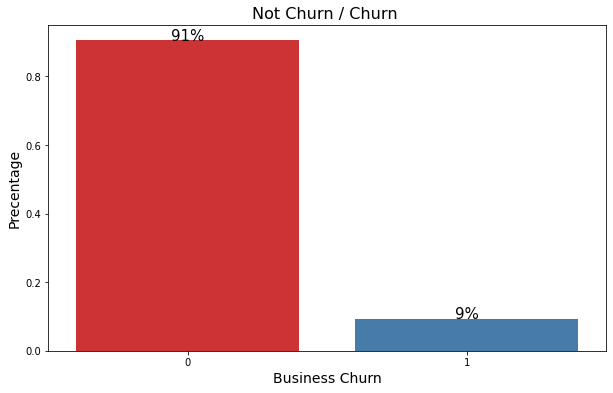

In [7]:
#Ploting barplot for target 
plt.figure(figsize=(10,6))
g = sns.barplot(df['current_bussiness_status'], df['current_bussiness_status'], palette='Set1', estimator=lambda x: len(x) / len(df) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Business Churn', fontsize=14)
plt.ylabel('Precentage', fontsize=14)
plt.title('Not Churn / Churn ', fontsize=16)

In [8]:
df.groupby(['current_bussiness_status']).count()

Unnamed: 0  bussinesID  billing_cycle  country  \
current_bussiness_status                                                   
0                              11954       11954          11954    11329   
1                               1242        1242           1242     1231   

                          created_on  last_login  tenure  stores/franchise  \
current_bussiness_status                                                     
0                              11954       11042   11954             11954   
1                               1242        1224    1242              1242   

                          no_of_repair_jobs  no_of_customers  ...  use_Square  \
current_bussiness_status                                      ...               
0                                     11954            11954  ...       11954   
1                                      1242             1242  ...        1242   

                          use_SmsGlobal  use_SmsBroadcast  use_ClickaTell  \
current_bussiness_status                                                    
0                                 11954             11954           11954   
1                                  1242              1242            1242   

                          use_RingCentral  use_Square.1  use_RepairDeskPay  \
current_bussiness_status                                                     
0                                   11954         11954              11954   
1                                    1242          1242               1242   

                          use_FreePBX  use_GoogleCloudPrint  average sales  
current_bussiness_status                                                    
0                               11954                 11954          11954  
1                                1242                  1242           1242  

[2 rows x 32 columns]

In [9]:
df.groupby(['tenure','current_bussiness_status']).count()

Unnamed: 0  bussinesID  billing_cycle  \
tenure current_bussiness_status                                          
0      0                              10875       10875          10875   
       1                                453         453            453   
1      0                                603         603            603   
       1                                327         327            327   
2      0                                301         301            301   
       1                                224         224            224   
3      0                                124         124            124   
       1                                138         138            138   
4      0                                 39          39             39   
       1                                 66          66             66   
5      0                                 12          12             12   
       1                                 34          34             34   

                                 country  created_on  last_login  \
tenure current_bussiness_status                                    
0      0                           10280       10875        9963   
       1                             452         453         435   
1      0                             588         603         603   
       1                             321         327         327   
2      0                             296         301         301   
       1                             222         224         224   
3      0                             118         124         124   
       1                             136         138         138   
4      0                              35          39          39   
       1                              66          66          66   
5      0                              12          12          12   
       1                              34          34          34   

                                 stores/franchise  no_of_repair_jobs  \
tenure current_bussiness_status                                        
0      0                                    10875              10875   
       1                                      453                453   
1      0                                      603                603   
       1                                      327                327   
2      0                                      301                301   
       1                                      224                224   
3      0                                      124                124   
       1                                      138                138   
4      0                                       39                 39   
       1                                       66                 66   
5      0                                       12                 12   
       1                                       34                 34   

                                 no_of_customers  total_revenue  ...  \
tenure current_bussiness_status                                  ...   
0      0                                   10875          10875  ...   
       1                                     453            453  ...   
1      0                                     603            603  ...   
       1                                     327            327  ...   
2      0                                     301            301  ...   
       1                                     224            224  ...   
3      0                                     124            124  ...   
       1                                     138            138  ...   
4      0                                      39             39  ...   
       1                                      66             66  ...   
5      0                                      12             12  ...   
       1                                      34             34  ...   

                         

In [10]:
df.groupby(['total_revenue','current_bussiness_status']).count()

Unnamed: 0  bussinesID  billing_cycle  \
total_revenue current_bussiness_status                                          
0.000000e+00  0                              11474       11474          11474   
              1                                 52          52             52   
1.000000e-02  0                                  1           1              1   
3.000000e-02  1                                  1           1              1   
1.060000e+00  1                                  1           1              1   
...                                            ...         ...            ...   
9.789754e+07  1                                  1           1              1   
1.199352e+08  1                                  1           1              1   
2.328991e+08  1                                  1           1              1   
6.873501e+08  1                                  1           1              1   
2.433955e+09  1                                  1           1              1   

                                        country  created_on  last_login  \
total_revenue current_bussiness_status                                    
0.000000e+00  0                           10858       11474       10576   
              1                              52          52          52   
1.000000e-02  0                               1           1           1   
3.000000e-02  1                               1           1           1   
1.060000e+00  1                               1           1           1   
...                                         ...         ...         ...   
9.789754e+07  1                               1           1           1   
1.199352e+08  1                               1           1           1   
2.328991e+08  1                               1           1           1   
6.873501e+08  1                               1           1           1   
2.433955e+09  1                               1           1           1   

                                        tenure  stores/franchise  \
total_revenue current_bussiness_status                             
0.000000e+00  0                          11474             11474   
              1                             52                52   
1.000000e-02  0                              1                 1   
3.000000e-02  1                              1                 1   
1.060000e+00  1                              1                 1   
...                                        ...               ...   
9.789754e+07  1                              1                 1   
1.199352e+08  1                              1                 1   
2.328991e+08  1                              1                 1   
6.873501e+08  1                              1                 1   
2.433955e+09  1                              1                 1   

                                        no_of_repair_jobs  no_of_customers  \
total_revenue current_bussiness_status                                       
0.000000e+00  0                                     11474            11474   
              1                                        52               52   
1.000000e-02  0                                         1                1   
3.000000e-02  1                                         1                1   
1.060000e+00  1                                         1                1   
...                                                   ...              ...   
9.789754e+07  1                                         1                1   
1.199352e+08  1                                         1                1   
2.328991e+08  1                                         1                1   
6.873501e+08  1                                         1                1   
2.433955e+09  1                                         1                1   

                                        ...  use_Square  use_SmsGlobal  \
total_revenue current_bussiness_stat

In [11]:
df[['last_login']]
df['last_login'] = pd.to_datetime(df.last_login)
# creating a new column called "days since last login" to utilize this column. Just subtract date from todays date. to get values
# same goes for creatod on, days since creation

df[['created_on']]
df['created_on'] = pd.to_datetime(df.created_on)



df['last_login'] = df['last_login'].dt.strftime('%Y-%m-%d')
df[['last_login']]
df['today'] = pd.to_datetime('2021-01-15').strftime('%Y-%m-%d')



df['created_on'] = df['created_on'].dt.strftime('%Y-%m-%d')
df[['created_on']]
df['today'] = pd.to_datetime('2021-01-15').strftime('%Y-%m-%d')


df['last_login'] = pd.to_datetime(df['last_login'])
df['today'] = pd.to_datetime(df['today'])
df['Days last_login'] = df['today'] - df['last_login']


df['created_on'] = pd.to_datetime(df['created_on'])
df['today'] = pd.to_datetime(df['today'])
df['Days created_on'] = df['today'] - df['created_on']

df['Days last_login']=df['Days last_login'].dt.days

df['Days created_on']=df['Days created_on'].dt.days

In [12]:
df.head()

Unnamed: 0                        bussinesID billing_cycle  \
0           0  c4ca4238a0b923820dcc509a6f75849b       Monthly   
1           1  45c48cce2e2d7fbdea1afc51c7c6ad26       Monthly   
2           2  d3d9446802a44259755d38e6d163e820       Monthly   
3           3  6512bd43d9caa6e02c990b0a82652dca       Monthly   
4           4  aab3238922bcc25a6f606eb525ffdc56       Monthly   

                country created_on last_login  tenure  stores/franchise  \
0  United Arab Emirates 2015-07-24 2020-12-16       5                 5   
1        United Kingdom 2015-02-27        NaT       0                 1   
2         United States 2015-02-28 2021-01-04       5                10   
3        United Kingdom 2015-03-02 2017-12-05       2                 2   
4              Pakistan 2015-03-03 2015-12-01       0                 1   

   no_of_repair_jobs  no_of_customers  ...  use_RingCentral  use_Square.1  \
0                593             5465  ...            False         False   
1                  3                2  ...            False         False   
2                567               26  ...            False         False   
3                 43               38  ...            False         False   
4                  9                2  ...            False         False   

   use_RepairDeskPay  use_FreePBX  use_GoogleCloudPrint  \
0              False        False                  True   
1              False        False                 False   
2               True        False                  True   
3              False        False                 False   
4              False        False                 False   

   current_bussiness_status  average sales      today  Days last_login  \
0                         0      22360.466 2021-01-15             30.0   
1                         0        198.190 2021-01-15              NaN   
2                         0      25754.008 2021-01-15             11.0   
3                         0       1242.890 2021-01-15           1137.0   
4                         0       1370.000 2021-01-15           1872.0   

   Days created_on  
0             2002  
1             2149  
2             2148  
3             2146  
4             2145  

[5 rows x 36 columns]

In [13]:
df.groupby(['Days last_login','current_bussiness_status']).count()

Unnamed: 0  bussinesID  \
Days last_login current_bussiness_status                           
6.0             0                                 34          34   
                1                                489         489   
7.0             0                                 56          56   
                1                                343         343   
8.0             0                                 45          45   
...                                              ...         ...   
1950.0          0                                  1           1   
1951.0          0                                  1           1   
1952.0          0                                  3           3   
1954.0          0                                  2           2   
1955.0          0                                  2           2   

                                          billing_cycle  country  created_on  \
Days last_login current_bussiness_status                                       
6.0             0                                    34       34          34   
                1                                   489      484         489   
7.0             0                                    56       56          56   
                1                                   343      340         343   
8.0             0                                    45       45          45   
...                                                 ...      ...         ...   
1950.0          0                                     1        1           1   
1951.0          0                                     1        1           1   
1952.0          0                                     3        3           3   
1954.0          0                                     2        1           2   
1955.0          0                                     2        2           2   

                                          last_login  tenure  \
Days last_login current_bussiness_status                       
6.0             0                                 34      34   
                1                                489     489   
7.0             0                                 56      56   
                1                                343     343   
8.0             0                                 45      45   
...                                              ...     ...   
1950.0          0                                  1       1   
1951.0          0                                  1       1   
1952.0          0                                  3       3   
1954.0          0                                  2       2   
1955.0          0                                  2       2   

                                          stores/franchise  no_of_repair_jobs  \
Days last_login current_bussiness_status                                        
6.0             0                                       34                 34   
                1                                      489                489   
7.0             0                                       56                 56   
                1                                      343                343   
8.0             0                                       45                 45   
...                                                    ...                ...   
1950.0          0                                        1                  1   
1951.0          0                                        1                  1   
1952.0          0                                        3                  3   
1954.0          0                                        2                  2   
1955.0          0                                        2                  2   

                                          no_of_customers  ...  \
Days last_login current_bussiness_status                   ...   
6.0             0                                      34  ...   
                1              

In [14]:
to_drop=['Unnamed: 0','bussinesID', 'created_on', 'last_login','country','Days created_on','Days last_login','today']
df.drop(to_drop, inplace=True, axis=1)

In [15]:
df.head()

billing_cycle  tenure  stores/franchise  no_of_repair_jobs  no_of_customers  \
0       Monthly       5                 5                593             5465   
1       Monthly       0                 1                  3                2   
2       Monthly       5                10                567               26   
3       Monthly       2                 2                 43               38   
4       Monthly       0                 1                  9                2   

   total_revenue  amount_receivable  no_of_purchases  use_Paypal  use_Cayan  \
0      111802.33           43684.29                0       False       True   
1         198.19              89.10                0       False      False   
2      257540.08          121470.29                0       False       True   
3        2485.78            2030.79                0       False      False   
4        1370.00            1120.00                0       False      False   

   ...  use_SmsGlobal  use_SmsBroadcast  use_ClickaTell  use_RingCentral  \
0  ...          False             False           False            False   
1  ...          False             False           False            False   
2  ...          False             False           False            False   
3  ...          False             False           False            False   
4  ...          False             False           False            False   

   use_Square.1  use_RepairDeskPay  use_FreePBX  use_GoogleCloudPrint  \
0         False              False        False                  True   
1         False              False        False                 False   
2         False               True        False                  True   
3         False              False        False                 False   
4         False              False        False                 False   

   current_bussiness_status  average sales  
0                         0      22360.466  
1                         0        198.190  
2                         0      25754.008  
3                         0       1242.890  
4                         0       1370.000  

[5 rows x 28 columns]

#**Scale and Encode Columns**

This process is the same concept as in **scaling or normalization**, where we use the train data to scale or normalize the test data.
**Encoding** is the process of converting data from one form to another required form.


**Encoding**
>> In encoding we convert TRUE and FALSE to 0,1 and categorical columns in Dependant Varaible X 
>> #### **LabelEncoder**
>> Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

* **Scaling**
>> Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.
>> #### **StandardScaler**
>> Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

>> The standard score of a sample x is calculated as:

>> `z = (x - u) / s`

>> where u is the mean of the training samples, and s is the standard deviation of the training samples or one.

In [16]:
# scale and encode columns
ss = StandardScaler()
le = LabelEncoder()
# Transform all categorical columns in Dependant Varaible X
for i in df.columns:
    if df[i].dtype not in ['int64','float64'] :
        df[[i]]=le.fit_transform(df[[i]])
    elif i not in ['current_bussiness_status']:
        df[[i]]=ss.fit_transform(df[[i]])
        

In [17]:
X_df = df.loc[:, df.columns != 'current_bussiness_status']
y_df = df['current_bussiness_status']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df,y_df,test_size=0.2,stratify=y_df)


In [19]:
X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10556, 27), (2640, 27), (10556,), (2640,))

X_train = X_train_df.values
y_train = y_train_df.values
X_test = X_test_df.values
y_test = y_test_df.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# **Without Class Imbalance Handling**
Now we give a try without removing class imbalance problem and compare results.


Testing Classifier  Nearest Neighbors

Classification Score 0.9446969696969697

ROC Score : 0.9011110624123422

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2392
           1       0.75      0.62      0.68       248

    accuracy                           0.94      2640
   macro avg       0.86      0.80      0.82      2640
weighted avg       0.94      0.94      0.94      2640


Confusion Matrix

[[2341   51]
 [  95  153]]

ROC Curve



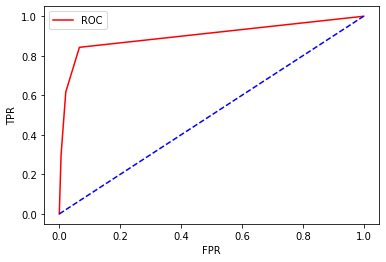


PR Curve



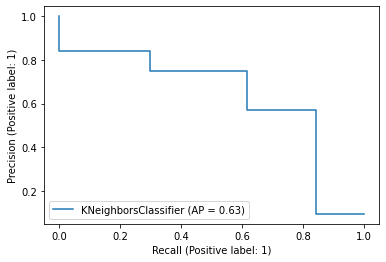


Testing Classifier  Logistic Regression

Classification Score 0.946590909090909

ROC Score : 0.9523967661020606

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2392
           1       0.79      0.59      0.67       248

    accuracy                           0.95      2640
   macro avg       0.87      0.79      0.82      2640
weighted avg       0.94      0.95      0.94      2640


Confusion Matrix

[[2353   39]
 [ 102  146]]

ROC Curve



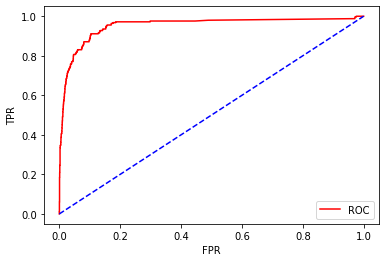


PR Curve



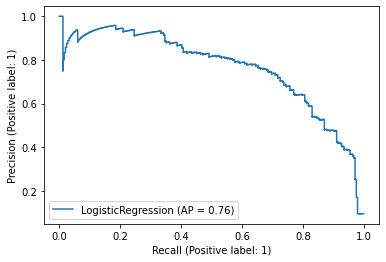


Testing Classifier  Linear SVM

Classification Score 0.9458333333333333

ROC Score : 0.9525661816269285

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2392
           1       0.78      0.58      0.67       248

    accuracy                           0.95      2640
   macro avg       0.87      0.78      0.82      2640
weighted avg       0.94      0.95      0.94      2640


Confusion Matrix

[[2352   40]
 [ 103  145]]

ROC Curve



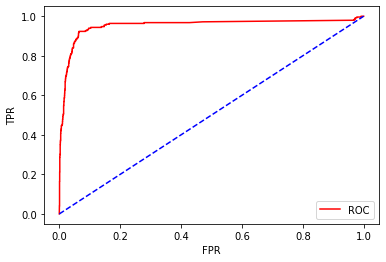


PR Curve



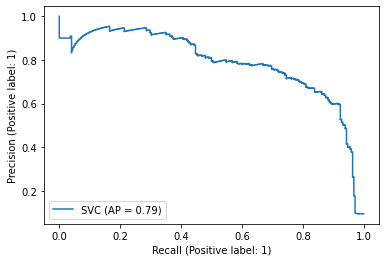


Testing Classifier  RBF SVM

Classification Score 0.9401515151515152

ROC Score : 0.9450225550221167

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2392
           1       0.66      0.75      0.70       248

    accuracy                           0.94      2640
   macro avg       0.82      0.86      0.83      2640
weighted avg       0.94      0.94      0.94      2640


Confusion Matrix

[[2295   97]
 [  61  187]]

ROC Curve



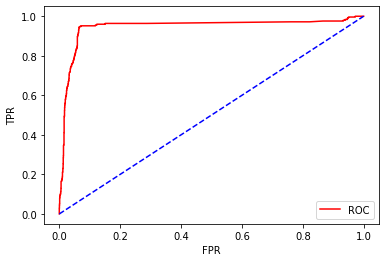


PR Curve



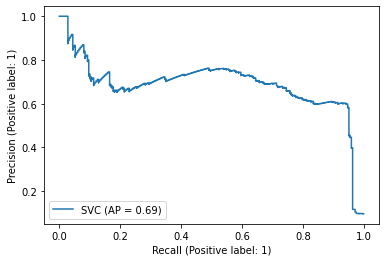


Testing Classifier  Decision Tree

Classification Score 0.9659090909090909

ROC Score : 0.9729634736756931

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2392
           1       0.79      0.87      0.83       248

    accuracy                           0.97      2640
   macro avg       0.89      0.92      0.90      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2335   57]
 [  33  215]]

ROC Curve



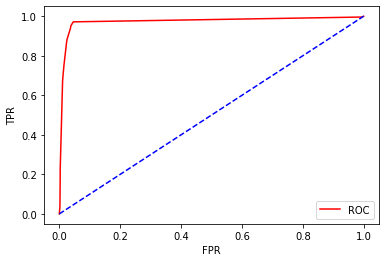


PR Curve



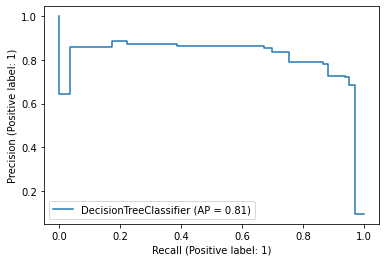


Testing Classifier  Random Forest

Classification Score 0.9651515151515152

ROC Score : 0.9810760330132701

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2392
           1       0.78      0.87      0.82       248

    accuracy                           0.97      2640
   macro avg       0.88      0.92      0.90      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2332   60]
 [  32  216]]

ROC Curve



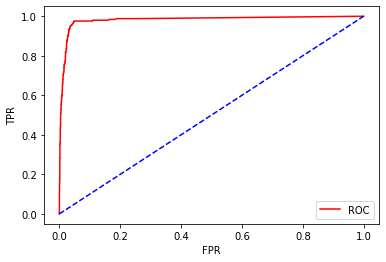


PR Curve



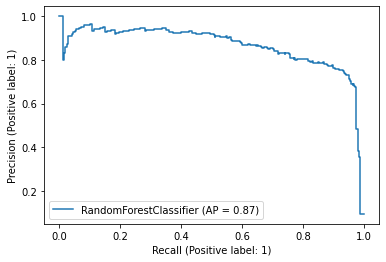


Testing Classifier  Neural Net

Classification Score 0.9492424242424242

ROC Score : 0.9594329889955766

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2392
           1       0.80      0.61      0.69       248

    accuracy                           0.95      2640
   macro avg       0.88      0.80      0.83      2640
weighted avg       0.95      0.95      0.95      2640


Confusion Matrix

[[2355   37]
 [  97  151]]

ROC Curve



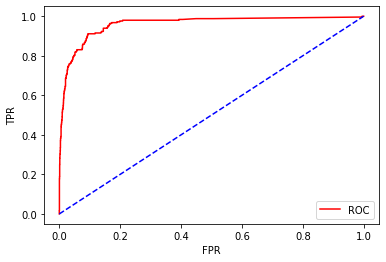


PR Curve



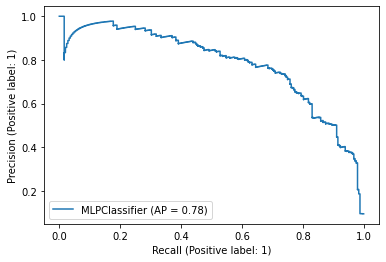


Testing Classifier  AdaBoost

Classification Score 0.9621212121212122

ROC Score : 0.9839442968497141

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2392
           1       0.80      0.79      0.80       248

    accuracy                           0.96      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.96      0.96      0.96      2640


Confusion Matrix

[[2344   48]
 [  52  196]]

ROC Curve



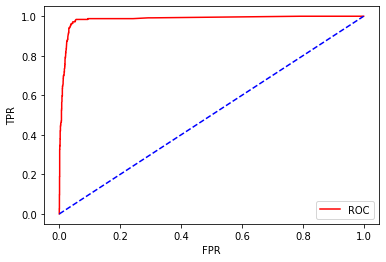


PR Curve



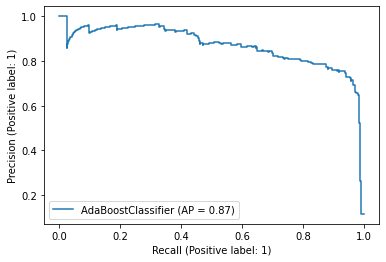


Testing Classifier  Naive Bayes

Classification Score 0.9208333333333333

ROC Score : 0.935496513917359

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2392
           1       0.57      0.68      0.62       248

    accuracy                           0.92      2640
   macro avg       0.77      0.81      0.79      2640
weighted avg       0.93      0.92      0.92      2640


Confusion Matrix

[[2263  129]
 [  80  168]]

ROC Curve



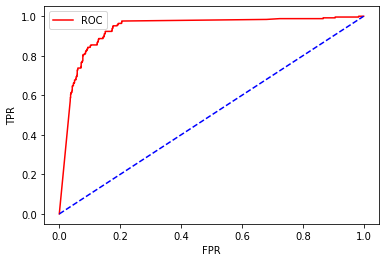


PR Curve



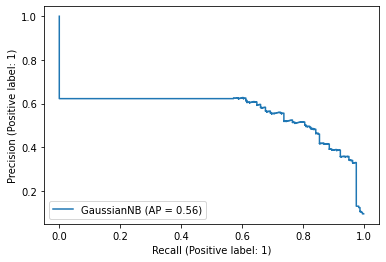

In [20]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]                                       # fit and predict ====   prediction model                 fit transform ==== encode scalarize
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


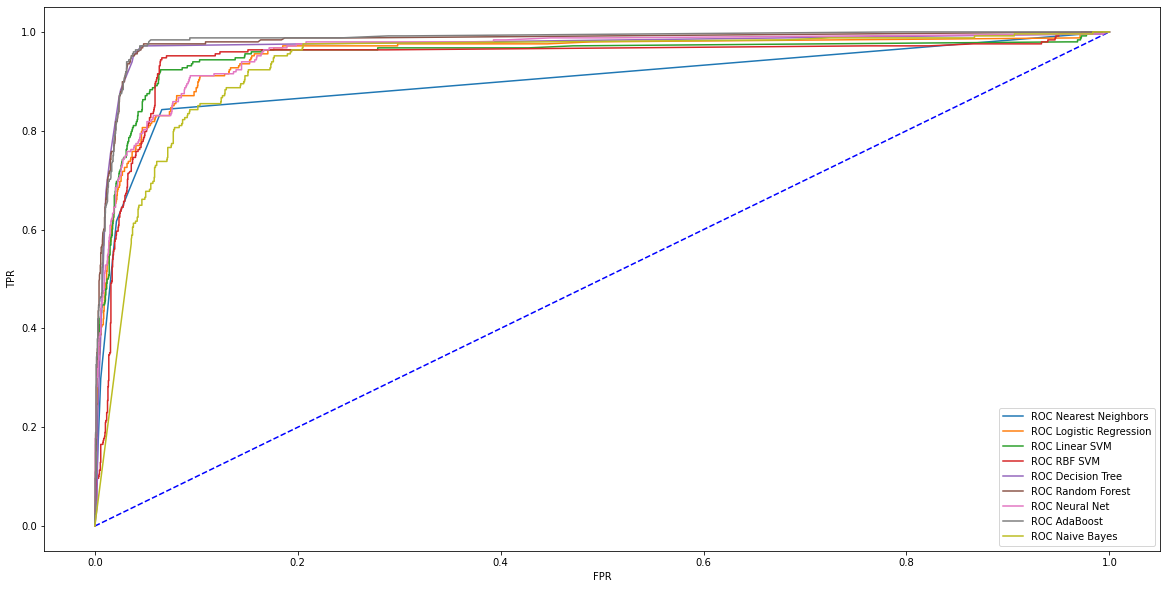

In [23]:
plot_roc_curve_many(fprs,tprs,names)

# **Balanced Resampling (Class 0 Downsample, Class 1 Upsample)**
As we saw our data has impbalance class problem like sample belongs to '0' class are **11954** and to '1' class are **1242**.

To remove imbalance we downsample class '0' and up sample class '1' and make them equale. then try diffrent models and compare score.

In [24]:
# Merge X_train_df and y_train_df to get a complete dataframe for sampling
merged_df = pd.concat([X_train_df, y_train_df], axis=1)

In [25]:
# Separate class 0 and 1
class_0 = merged_df[merged_df['current_bussiness_status'] == 0]
class_1 = merged_df[merged_df['current_bussiness_status'] == 1] 

# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (9562, 28)
class 1: (994, 28)


In [26]:
# Predict class count
class_count_0, class_count_1 = df['current_bussiness_status'].value_counts()


In [27]:
# Set paramter for under and over sampling of both classes
n_times = 4
# According to Count Num of Class_0 we get Sample from Class_1 and assign new class_1_over (For Balncing Class 0 and 1)
class_1_over = class_1.sample(class_count_1*n_times, replace=True)
class_0_under = class_0.sample(class_count_1*n_times)

test_balanced = pd.concat([class_1_over, class_0_under], axis=0)

print("Total class of 1 and 0:",test_balanced['current_bussiness_status'].value_counts())

Total class of 1 and 0: 1    4968
0    4968
Name: current_bussiness_status, dtype: int64


In [28]:
test_balanced.shape

(9936, 28)

In [29]:
X_balanced = test_balanced.loc[:, test_balanced.columns != 'current_bussiness_status'].values
y_balanced = test_balanced['current_bussiness_status'].values

In [30]:
X_balanced.shape, y_balanced.shape

((9936, 27), (9936,))


Testing Classifier  Nearest Neighbors

Classification Score 0.44734848484848483

ROC Score : 0.6031664688747438

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.41      0.57      2392
           1       0.13      0.83      0.22       248

    accuracy                           0.45      2640
   macro avg       0.54      0.62      0.40      2640
weighted avg       0.88      0.45      0.54      2640


Confusion Matrix

[[ 975 1417]
 [  42  206]]

ROC Curve



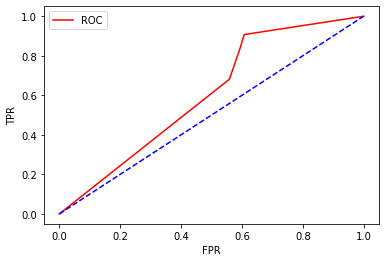


PR Curve



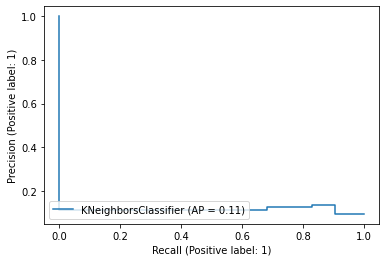


Testing Classifier  Logistic Regression

Classification Score 0.9329545454545455

ROC Score : 0.9599808501456467

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2392
           1       0.60      0.83      0.70       248

    accuracy                           0.93      2640
   macro avg       0.79      0.89      0.83      2640
weighted avg       0.95      0.93      0.94      2640


Confusion Matrix

[[2256  136]
 [  41  207]]

ROC Curve



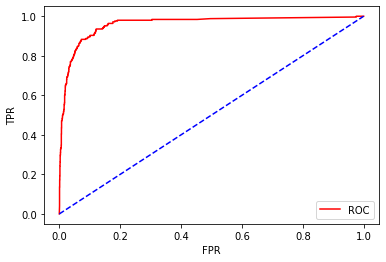


PR Curve



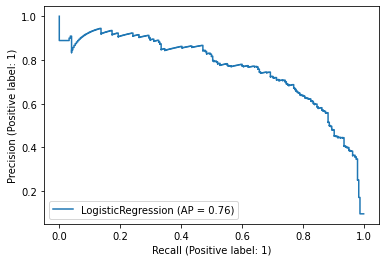


Testing Classifier  Linear SVM

Classification Score 0.928030303030303

ROC Score : 0.9582226372855757

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2392
           1       0.58      0.85      0.69       248

    accuracy                           0.93      2640
   macro avg       0.78      0.89      0.82      2640
weighted avg       0.95      0.93      0.93      2640


Confusion Matrix

[[2239  153]
 [  37  211]]

ROC Curve



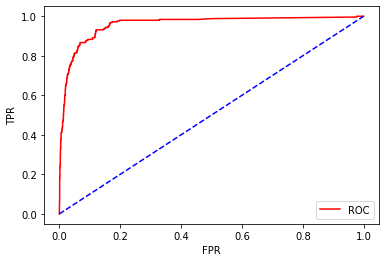


PR Curve



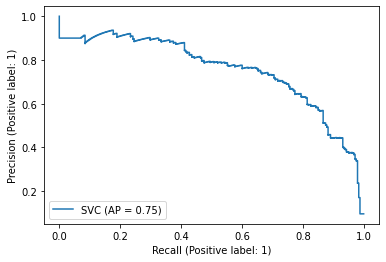


Testing Classifier  RBF SVM

Classification Score 0.9098484848484848

ROC Score : 0.9491331993742583

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2392
           1       0.51      0.90      0.65       248

    accuracy                           0.91      2640
   macro avg       0.75      0.90      0.80      2640
weighted avg       0.94      0.91      0.92      2640


Confusion Matrix

[[2180  212]
 [  26  222]]

ROC Curve



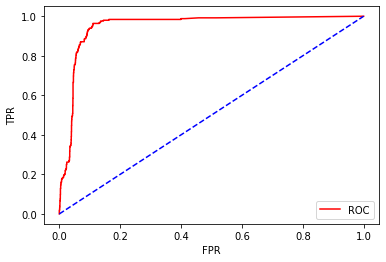


PR Curve



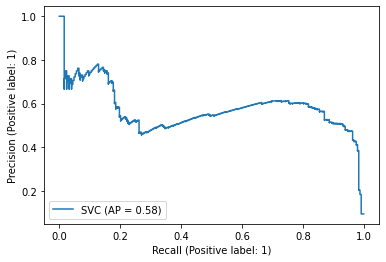


Testing Classifier  Decision Tree

Classification Score 0.9488636363636364

ROC Score : 0.957739676610206

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2392
           1       0.66      0.96      0.78       248

    accuracy                           0.95      2640
   macro avg       0.83      0.95      0.87      2640
weighted avg       0.96      0.95      0.95      2640


Confusion Matrix

[[2268  124]
 [  11  237]]

ROC Curve



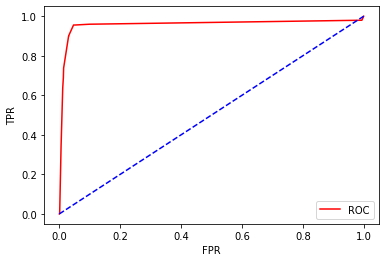


PR Curve



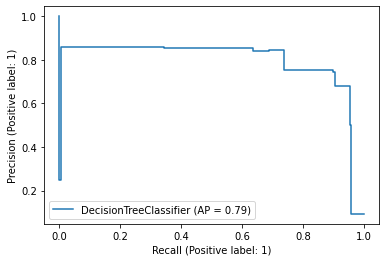


Testing Classifier  Random Forest

Classification Score 0.9545454545454546

ROC Score : 0.980962246466717

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2392
           1       0.68      0.96      0.80       248

    accuracy                           0.95      2640
   macro avg       0.84      0.96      0.89      2640
weighted avg       0.97      0.95      0.96      2640


Confusion Matrix

[[2281  111]
 [   9  239]]

ROC Curve



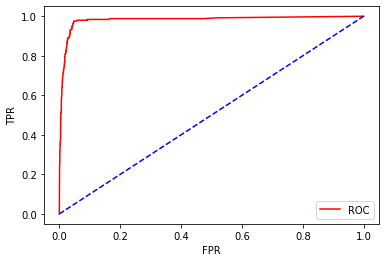


PR Curve



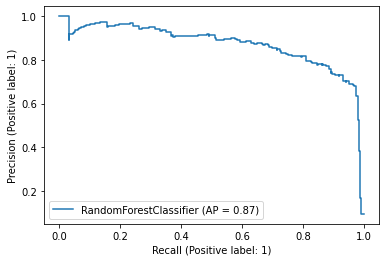


Testing Classifier  Neural Net

Classification Score 0.9231060606060606

ROC Score : 0.9617508630920272

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2392
           1       0.56      0.88      0.68       248

    accuracy                           0.92      2640
   macro avg       0.77      0.91      0.82      2640
weighted avg       0.95      0.92      0.93      2640


Confusion Matrix

[[2218  174]
 [  29  219]]

ROC Curve



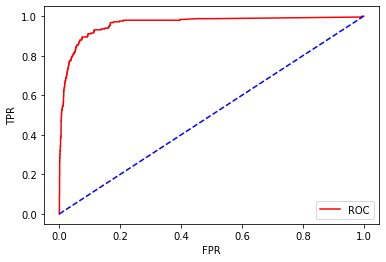


PR Curve



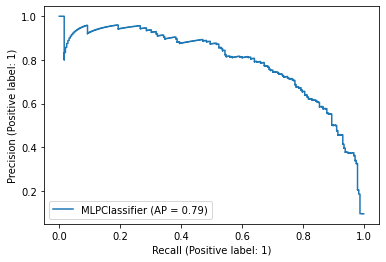


Testing Classifier  AdaBoost

Classification Score 0.9579545454545455

ROC Score : 0.9827179307368649

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2392
           1       0.70      0.96      0.81       248

    accuracy                           0.96      2640
   macro avg       0.85      0.96      0.89      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2290  102]
 [   9  239]]

ROC Curve



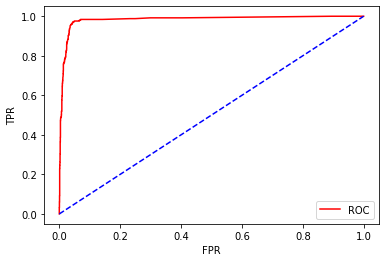


PR Curve



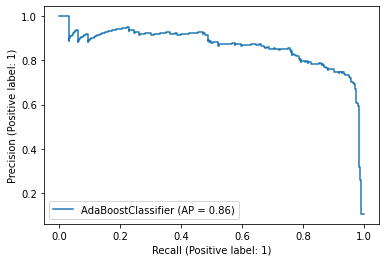


Testing Classifier  Naive Bayes

Classification Score 0.9204545454545454

ROC Score : 0.932467263189125

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2392
           1       0.56      0.68      0.62       248

    accuracy                           0.92      2640
   macro avg       0.76      0.81      0.79      2640
weighted avg       0.93      0.92      0.92      2640


Confusion Matrix

[[2261  131]
 [  79  169]]

ROC Curve



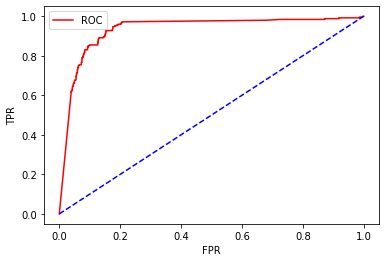


PR Curve



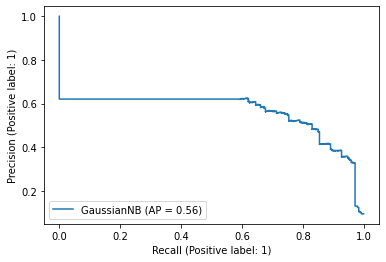

In [31]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_balanced, y_balanced)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


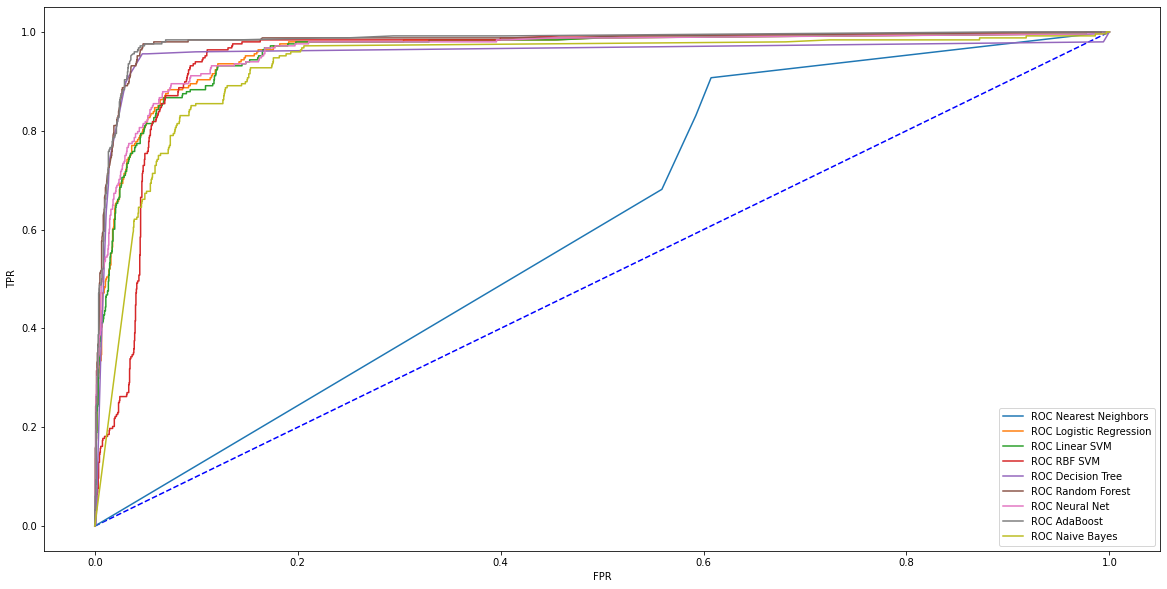

In [32]:
plot_roc_curve_many(fprs,tprs,names)

# **Under Sample Imbalance Technique**

In **under-sampling**, the simplest technique involves removing random records from the majority class

In [33]:
# Set paramter for under and over sampling of both classes
n_times = 4
# According to Count Num of Class_0 we get Sample from Class_1 and assign new class_1_over (For Balncing Class 0 and 1)
class_0_under = class_0.sample(class_count_1*n_times)

test_under = pd.concat([class_1, class_0_under], axis=0)

print("Total class of 1 and 0:",test_under['current_bussiness_status'].value_counts())

Total class of 1 and 0: 0    4968
1     994
Name: current_bussiness_status, dtype: int64


In [34]:
X_under = test_under.loc[:, test_under.columns != 'current_bussiness_status'].values
y_under = test_under['current_bussiness_status'].values
X_under.shape, y_under.shape

((5962, 27), (5962,))


Testing Classifier  Nearest Neighbors

Classification Score 0.9443181818181818

ROC Score : 0.8580997478152983

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2392
           1       0.69      0.73      0.71       248

    accuracy                           0.94      2640
   macro avg       0.83      0.85      0.84      2640
weighted avg       0.95      0.94      0.94      2640


Confusion Matrix

[[2313   79]
 [  68  180]]

ROC Curve



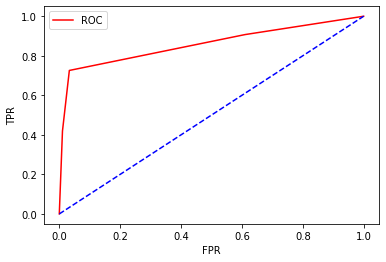


PR Curve



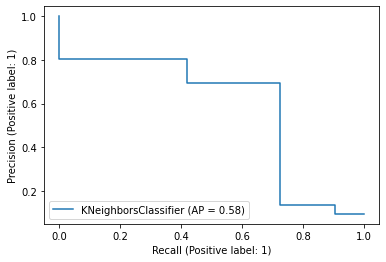


Testing Classifier  Logistic Regression

Classification Score 0.9515151515151515

ROC Score : 0.9523209084043587

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2392
           1       0.77      0.69      0.73       248

    accuracy                           0.95      2640
   macro avg       0.87      0.84      0.85      2640
weighted avg       0.95      0.95      0.95      2640


Confusion Matrix

[[2340   52]
 [  76  172]]

ROC Curve



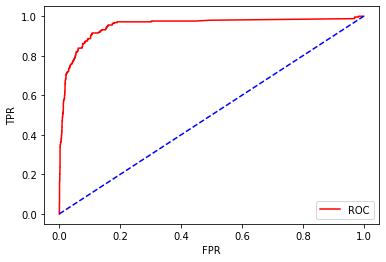


PR Curve



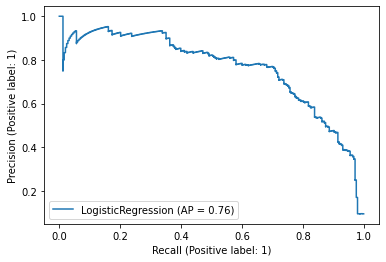


Testing Classifier  Linear SVM

Classification Score 0.9492424242424242

ROC Score : 0.9656550059337576

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2392
           1       0.78      0.64      0.70       248

    accuracy                           0.95      2640
   macro avg       0.87      0.81      0.84      2640
weighted avg       0.95      0.95      0.95      2640


Confusion Matrix

[[2348   44]
 [  90  158]]

ROC Curve



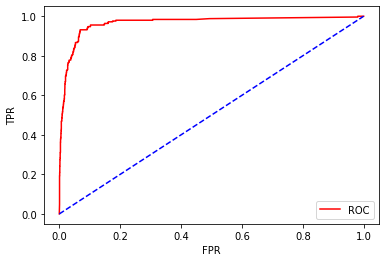


PR Curve



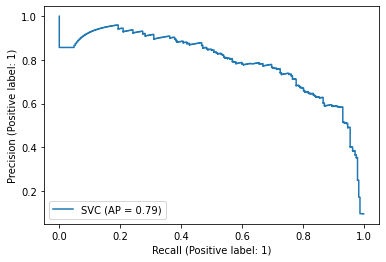


Testing Classifier  RBF SVM

Classification Score 0.9318181818181818

ROC Score : 0.9608051704606753

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2392
           1       0.60      0.81      0.69       248

    accuracy                           0.93      2640
   macro avg       0.79      0.88      0.83      2640
weighted avg       0.94      0.93      0.94      2640


Confusion Matrix

[[2259  133]
 [  47  201]]

ROC Curve



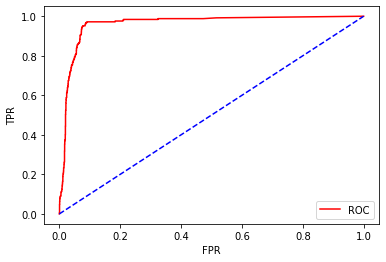


PR Curve



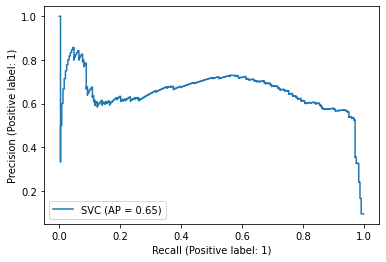


Testing Classifier  Decision Tree

Classification Score 0.9609848484848484

ROC Score : 0.9596108331535226

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2392
           1       0.73      0.93      0.82       248

    accuracy                           0.96      2640
   macro avg       0.86      0.95      0.90      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2307   85]
 [  18  230]]

ROC Curve



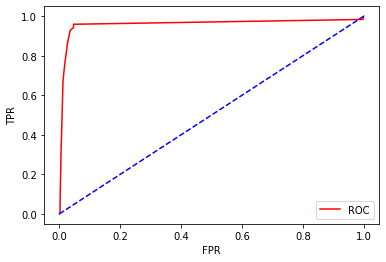


PR Curve



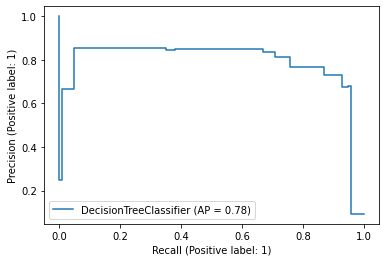


Testing Classifier  Random Forest

Classification Score 0.9613636363636363

ROC Score : 0.9801514119646131

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2392
           1       0.73      0.94      0.82       248

    accuracy                           0.96      2640
   macro avg       0.86      0.95      0.90      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2305   87]
 [  15  233]]

ROC Curve



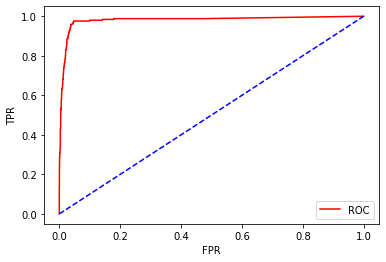


PR Curve



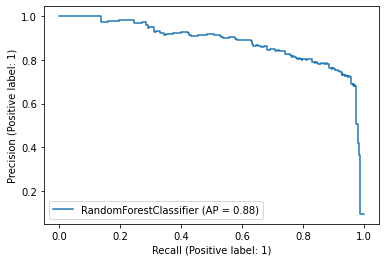


Testing Classifier  Neural Net

Classification Score 0.9492424242424242

ROC Score : 0.959899935268098

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2392
           1       0.74      0.71      0.72       248

    accuracy                           0.95      2640
   macro avg       0.85      0.84      0.85      2640
weighted avg       0.95      0.95      0.95      2640


Confusion Matrix

[[2330   62]
 [  72  176]]

ROC Curve



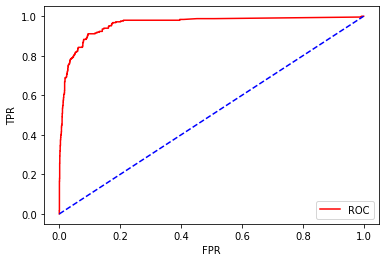


PR Curve



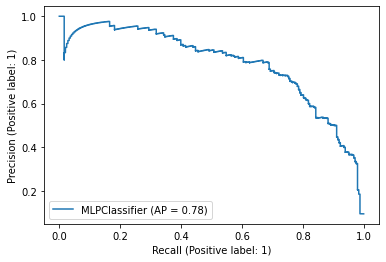


Testing Classifier  AdaBoost

Classification Score 0.9655303030303031

ROC Score : 0.9828662746790375

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2392
           1       0.77      0.90      0.83       248

    accuracy                           0.97      2640
   macro avg       0.88      0.94      0.91      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2325   67]
 [  24  224]]

ROC Curve



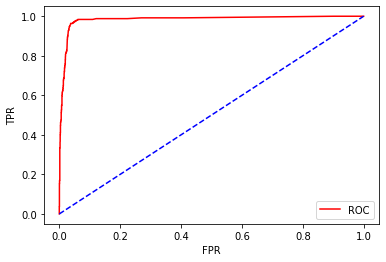


PR Curve



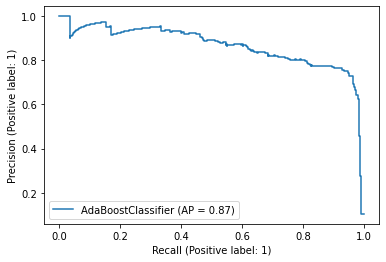


Testing Classifier  Naive Bayes

Classification Score 0.9204545454545454

ROC Score : 0.9392615843133024

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2392
           1       0.56      0.68      0.62       248

    accuracy                           0.92      2640
   macro avg       0.76      0.81      0.79      2640
weighted avg       0.93      0.92      0.92      2640


Confusion Matrix

[[2262  130]
 [  80  168]]

ROC Curve



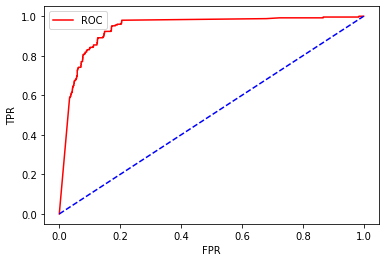


PR Curve



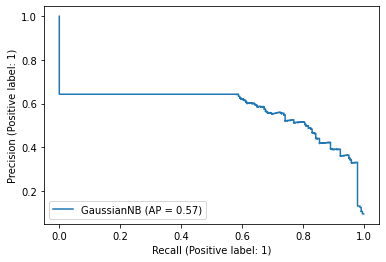

In [35]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_under, y_under)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


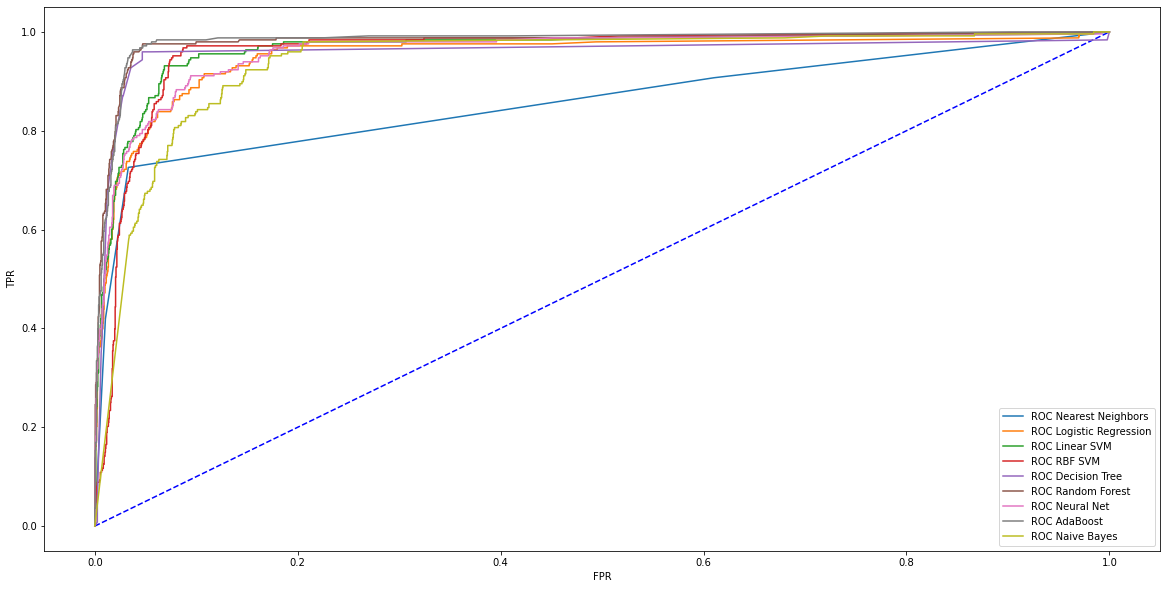

In [36]:
plot_roc_curve_many(fprs,tprs,names)

## Class_weight = balanced


Testing Classifier  Logistic Regression

Classification Score 0.9340909090909091

ROC Score : 0.9595518327219765

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2392
           1       0.61      0.84      0.71       248

    accuracy                           0.93      2640
   macro avg       0.80      0.89      0.83      2640
weighted avg       0.95      0.93      0.94      2640


Confusion Matrix

[[2257  135]
 [  39  209]]

ROC Curve



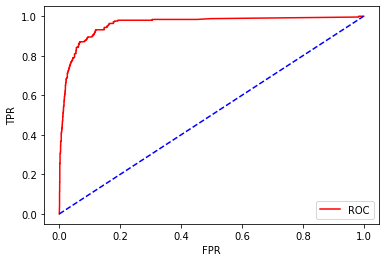


PR Curve



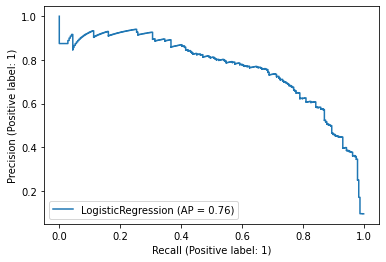


Testing Classifier  Linear SVM

Classification Score 0.9140151515151516

ROC Score : 0.9574674317617866

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2392
           1       0.53      0.85      0.65       248

    accuracy                           0.91      2640
   macro avg       0.75      0.89      0.80      2640
weighted avg       0.94      0.91      0.92      2640


Confusion Matrix

[[2201  191]
 [  36  212]]

ROC Curve



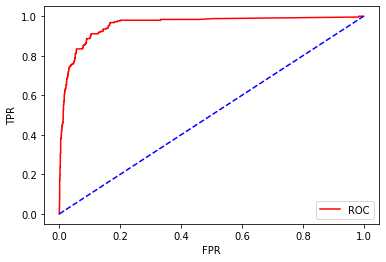


PR Curve



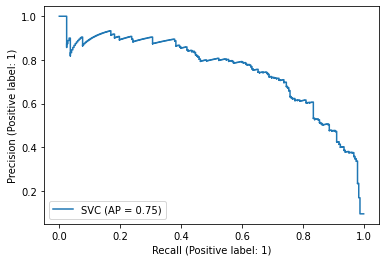


Testing Classifier  RBF SVM

Classification Score 0.9109848484848485

ROC Score : 0.9487539108857481

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2392
           1       0.51      0.90      0.66       248

    accuracy                           0.91      2640
   macro avg       0.75      0.91      0.80      2640
weighted avg       0.94      0.91      0.92      2640


Confusion Matrix

[[2181  211]
 [  24  224]]

ROC Curve



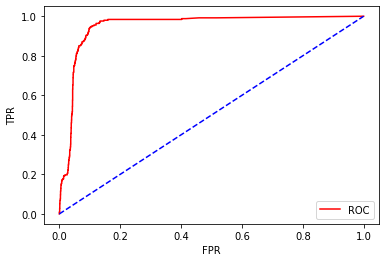


PR Curve



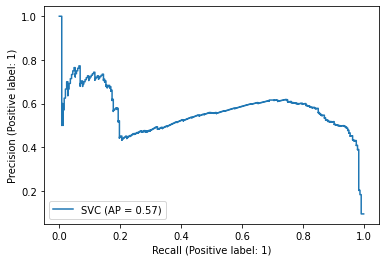


Testing Classifier  Decision Tree

Classification Score 0.9526515151515151

ROC Score : 0.9460221909051678

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2392
           1       0.68      0.94      0.79       248

    accuracy                           0.95      2640
   macro avg       0.84      0.95      0.88      2640
weighted avg       0.96      0.95      0.96      2640


Confusion Matrix

[[2281  111]
 [  14  234]]

ROC Curve



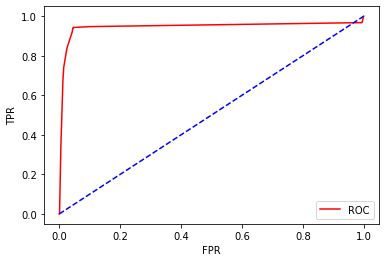


PR Curve



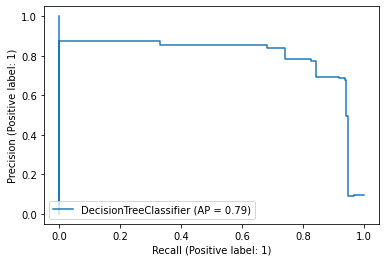


Testing Classifier  Random Forest

Classification Score 0.9564393939393939

ROC Score : 0.9801109545258389

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2392
           1       0.69      0.96      0.81       248

    accuracy                           0.96      2640
   macro avg       0.84      0.96      0.89      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2286  106]
 [   9  239]]

ROC Curve



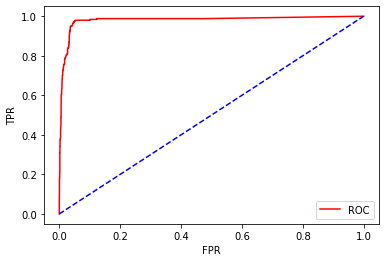


PR Curve



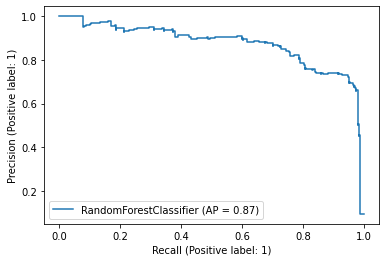

In [37]:
fprs,tprs=[],[]
for name,clf in zip(names_1,classifiers_1):
    print("\nTesting Classifier ",name)
    clf.fit(X_under, y_under)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


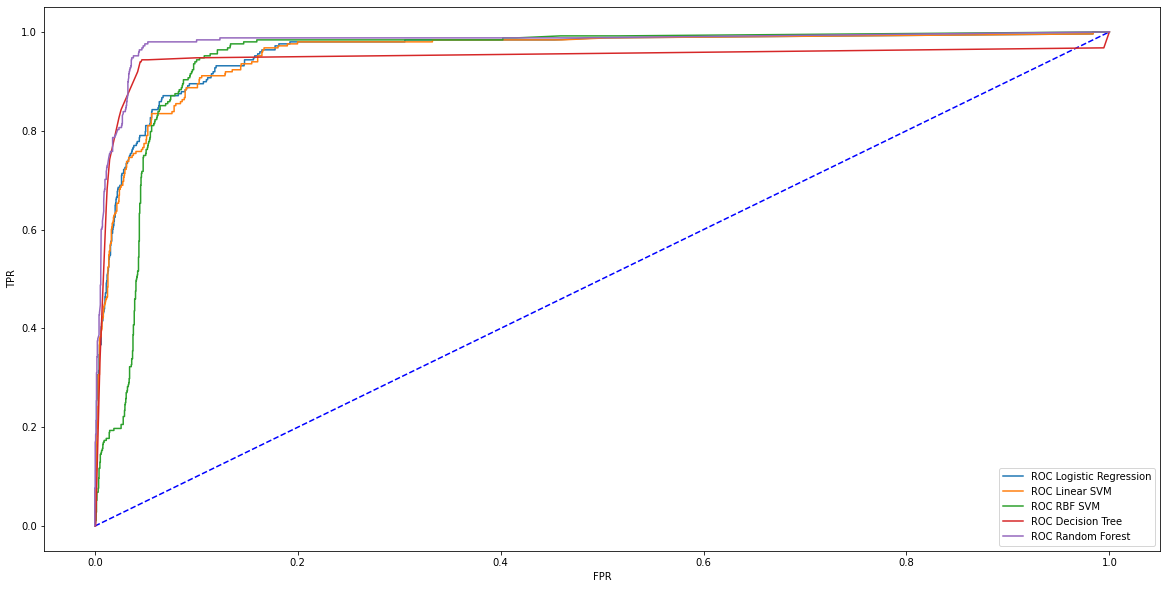

In [38]:
plot_roc_curve_many(fprs,tprs,names_1)

# **SMOTE Imbalance Technique**
**SMOTE** stands for **Synthetic Minority Oversampling Technique**. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

In [39]:
oversample = SMOTE(sampling_strategy='minority')
X_smote, y_smote = oversample.fit_resample(X_train,y_train)


Testing Classifier  Nearest Neighbors

Classification Score 0.9375

ROC Score : 0.9188862067105406

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2392
           1       0.63      0.82      0.71       248

    accuracy                           0.94      2640
   macro avg       0.80      0.89      0.84      2640
weighted avg       0.95      0.94      0.94      2640


Confusion Matrix

[[2271  121]
 [  44  204]]

ROC Curve



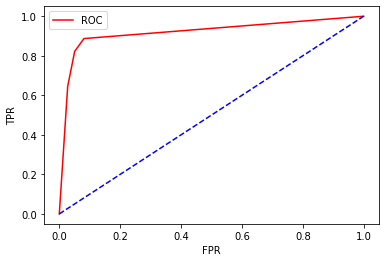


PR Curve



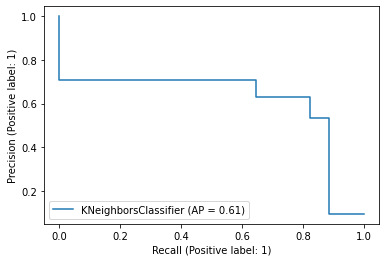


Testing Classifier  Logistic Regression

Classification Score 0.9295454545454546

ROC Score : 0.960291866706225

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2392
           1       0.59      0.83      0.69       248

    accuracy                           0.93      2640
   macro avg       0.79      0.89      0.83      2640
weighted avg       0.95      0.93      0.93      2640


Confusion Matrix

[[2247  145]
 [  41  207]]

ROC Curve



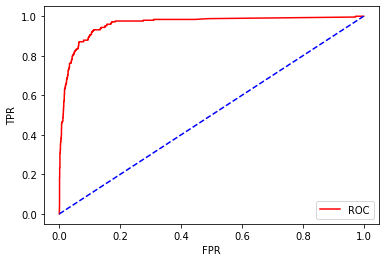


PR Curve



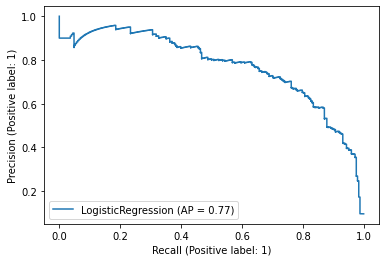


Testing Classifier  Linear SVM

Classification Score 0.9162878787878788

ROC Score : 0.9589036708382782

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2392
           1       0.53      0.86      0.66       248

    accuracy                           0.92      2640
   macro avg       0.76      0.89      0.81      2640
weighted avg       0.94      0.92      0.92      2640


Confusion Matrix

[[2206  186]
 [  35  213]]

ROC Curve



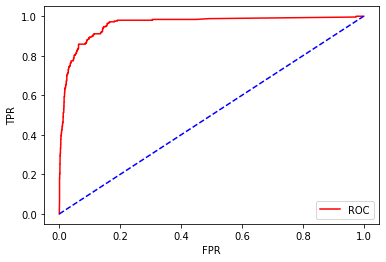


PR Curve



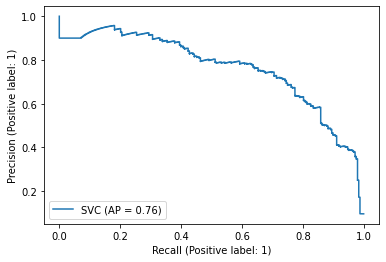


Testing Classifier  RBF SVM

Classification Score 0.9098484848484848

ROC Score : 0.9521809930952638

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2392
           1       0.51      0.90      0.65       248

    accuracy                           0.91      2640
   macro avg       0.75      0.91      0.80      2640
weighted avg       0.94      0.91      0.92      2640


Confusion Matrix

[[2179  213]
 [  25  223]]

ROC Curve



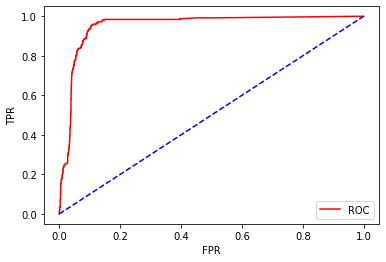


PR Curve



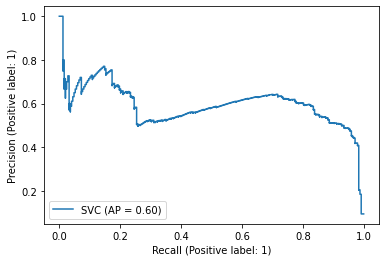


Testing Classifier  Decision Tree

Classification Score 0.956060606060606

ROC Score : 0.9665636125795662

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2392
           1       0.70      0.94      0.80       248

    accuracy                           0.96      2640
   macro avg       0.85      0.95      0.89      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2291  101]
 [  15  233]]

ROC Curve



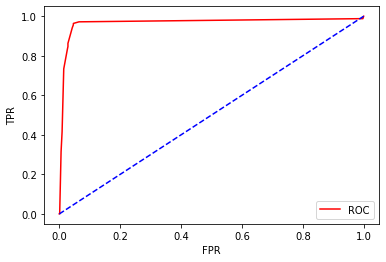


PR Curve



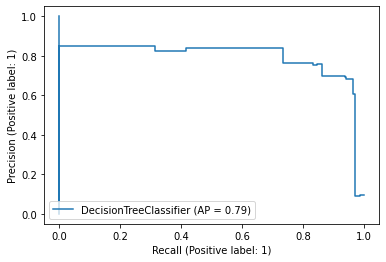


Testing Classifier  Random Forest

Classification Score 0.9556818181818182

ROC Score : 0.9795782649153091

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2392
           1       0.69      0.96      0.80       248

    accuracy                           0.96      2640
   macro avg       0.84      0.96      0.89      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2285  107]
 [  10  238]]

ROC Curve



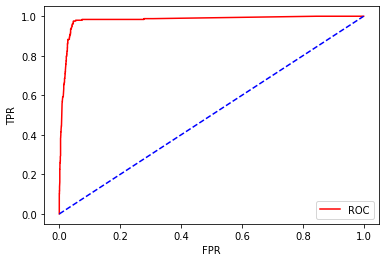


PR Curve



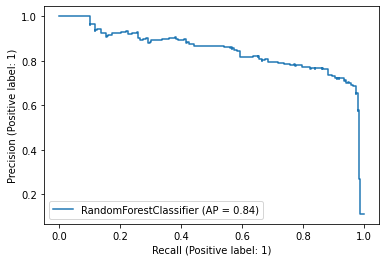


Testing Classifier  Neural Net

Classification Score 0.9268939393939394

ROC Score : 0.962718470169382

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2392
           1       0.57      0.88      0.69       248

    accuracy                           0.93      2640
   macro avg       0.78      0.91      0.83      2640
weighted avg       0.95      0.93      0.93      2640


Confusion Matrix

[[2228  164]
 [  29  219]]

ROC Curve



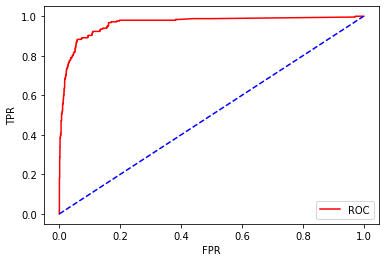


PR Curve



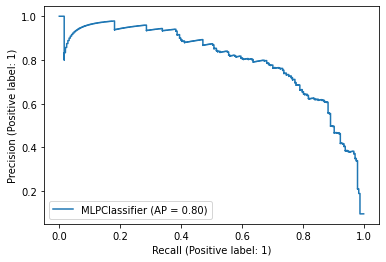


Testing Classifier  AdaBoost

Classification Score 0.9579545454545455

ROC Score : 0.9833492353544071

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2392
           1       0.71      0.93      0.81       248

    accuracy                           0.96      2640
   macro avg       0.85      0.95      0.89      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2298   94]
 [  17  231]]

ROC Curve



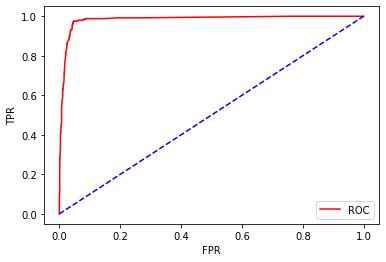


PR Curve



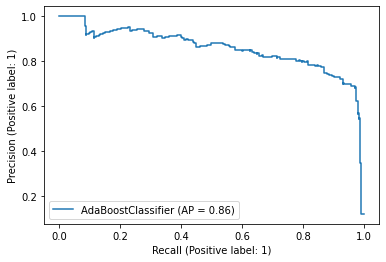


Testing Classifier  Naive Bayes

Classification Score 0.9200757575757575

ROC Score : 0.9398692887582264

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2392
           1       0.56      0.74      0.63       248

    accuracy                           0.92      2640
   macro avg       0.76      0.84      0.79      2640
weighted avg       0.93      0.92      0.92      2640


Confusion Matrix

[[2246  146]
 [  65  183]]

ROC Curve



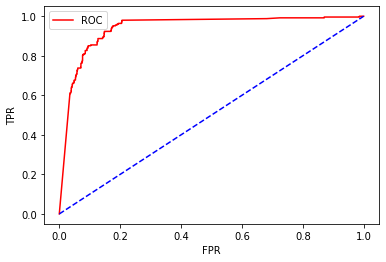


PR Curve



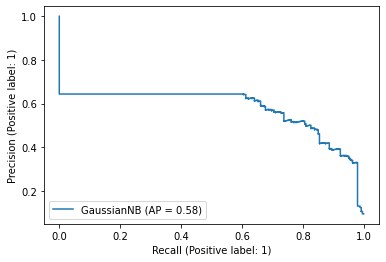

In [40]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_smote, y_smote)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


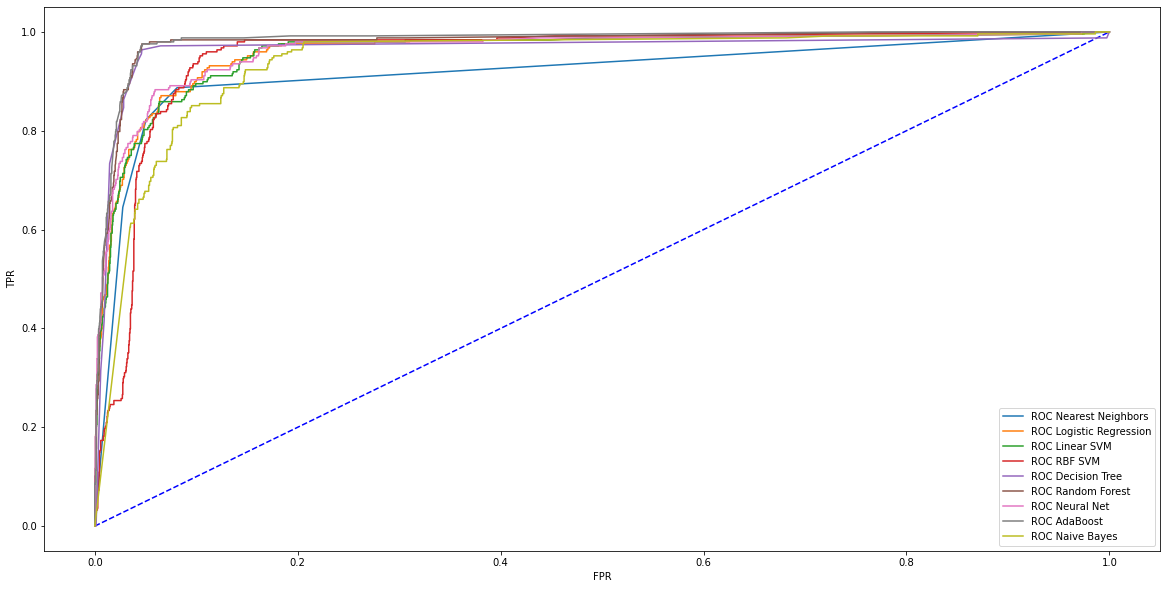

In [41]:
plot_roc_curve_many(fprs,tprs,names)

# **Borderline Smote Imbalance Technique**
It classifies any minority observation as a noise point if all the neighbors are the majority class and such an observation is ignored while creating synthetic data (Similar to DBSCAN)

In [42]:
oversample1 = BorderlineSMOTE()
X_borderline, y_borderline = oversample1.fit_resample(X_train, y_train)
X_borderline.shape, y_borderline.shape

((19124, 27), (19124,))


Testing Classifier  Nearest Neighbors

Classification Score 0.934469696969697

ROC Score : 0.9205719333261407

Classification Report

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2392
           1       0.61      0.82      0.70       248

    accuracy                           0.93      2640
   macro avg       0.80      0.88      0.83      2640
weighted avg       0.95      0.93      0.94      2640


Confusion Matrix

[[2263  129]
 [  44  204]]

ROC Curve



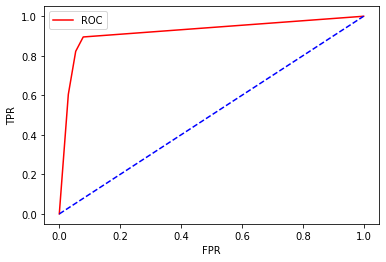


PR Curve



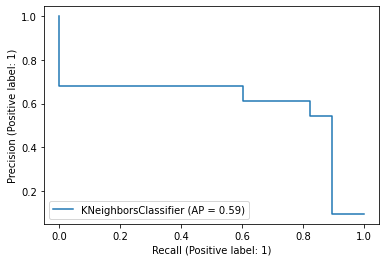


Testing Classifier  Logistic Regression

Classification Score 0.9022727272727272

ROC Score : 0.9559713493904413

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2392
           1       0.49      0.88      0.63       248

    accuracy                           0.90      2640
   macro avg       0.74      0.89      0.79      2640
weighted avg       0.94      0.90      0.91      2640


Confusion Matrix

[[2164  228]
 [  30  218]]

ROC Curve



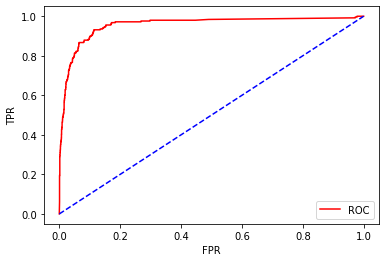


PR Curve



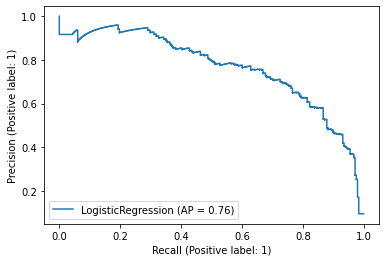


Testing Classifier  Linear SVM

Classification Score 0.890530303030303

ROC Score : 0.9551883293774949

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2392
           1       0.46      0.88      0.60       248

    accuracy                           0.89      2640
   macro avg       0.72      0.89      0.77      2640
weighted avg       0.94      0.89      0.91      2640


Confusion Matrix

[[2132  260]
 [  29  219]]

ROC Curve



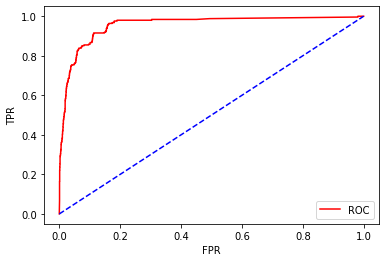


PR Curve



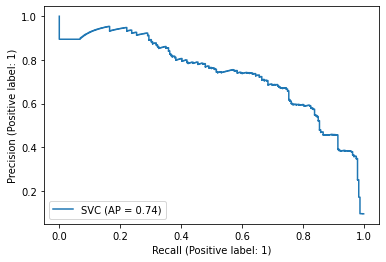


Testing Classifier  RBF SVM

Classification Score 0.8829545454545454

ROC Score : 0.9208955928363363

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2392
           1       0.44      0.93      0.60       248

    accuracy                           0.88      2640
   macro avg       0.72      0.90      0.76      2640
weighted avg       0.94      0.88      0.90      2640


Confusion Matrix

[[2101  291]
 [  18  230]]

ROC Curve



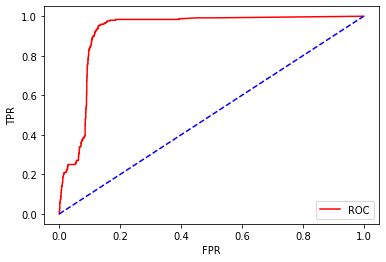


PR Curve



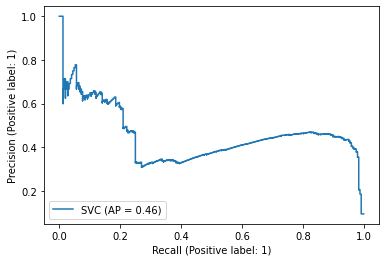


Testing Classifier  Decision Tree

Classification Score 0.9571969696969697

ROC Score : 0.9719697378357969

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2392
           1       0.70      0.95      0.81       248

    accuracy                           0.96      2640
   macro avg       0.85      0.95      0.89      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2291  101]
 [  12  236]]

ROC Curve



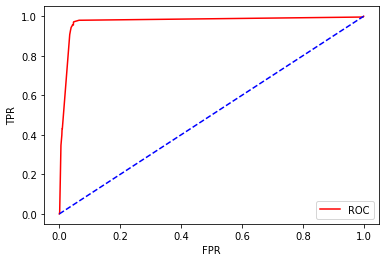


PR Curve



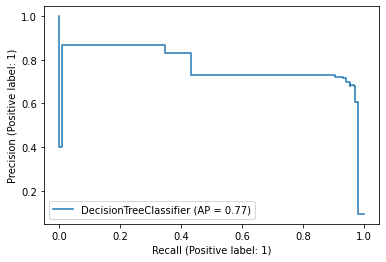


Testing Classifier  Random Forest

Classification Score 0.9568181818181818

ROC Score : 0.977460992286115

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2392
           1       0.69      0.97      0.81       248

    accuracy                           0.96      2640
   macro avg       0.85      0.96      0.89      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2286  106]
 [   8  240]]

ROC Curve



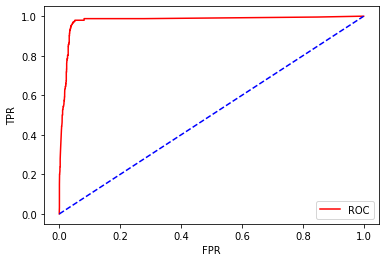


PR Curve



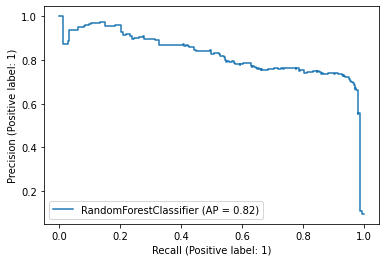


Testing Classifier  Neural Net

Classification Score 0.8727272727272727

ROC Score : 0.9624082964721115

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2392
           1       0.42      0.93      0.58       248

    accuracy                           0.87      2640
   macro avg       0.71      0.90      0.75      2640
weighted avg       0.94      0.87      0.89      2640


Confusion Matrix

[[2074  318]
 [  18  230]]

ROC Curve



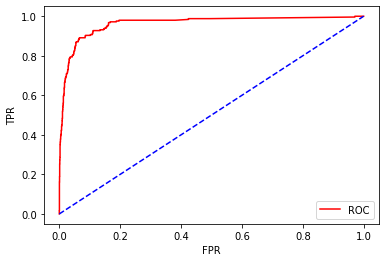


PR Curve



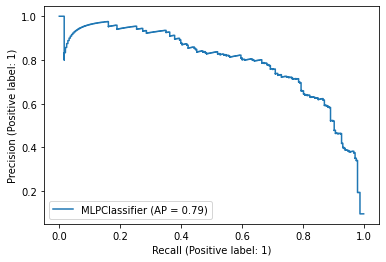


Testing Classifier  AdaBoost

Classification Score 0.9564393939393939

ROC Score : 0.9802736271442443

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2392
           1       0.70      0.93      0.80       248

    accuracy                           0.96      2640
   macro avg       0.85      0.95      0.89      2640
weighted avg       0.97      0.96      0.96      2640


Confusion Matrix

[[2294   98]
 [  17  231]]

ROC Curve



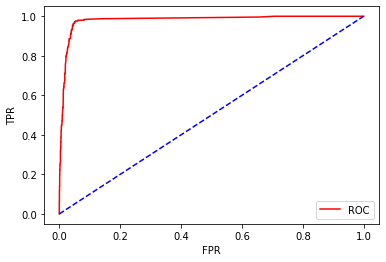


PR Curve



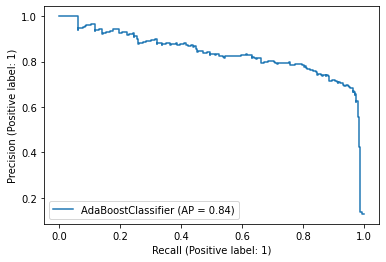


Testing Classifier  Naive Bayes

Classification Score 0.9121212121212121

ROC Score : 0.937136725914338

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2392
           1       0.52      0.74      0.61       248

    accuracy                           0.91      2640
   macro avg       0.75      0.83      0.78      2640
weighted avg       0.93      0.91      0.92      2640


Confusion Matrix

[[2225  167]
 [  65  183]]

ROC Curve



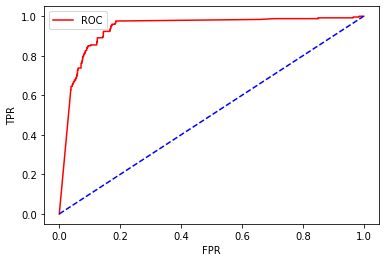


PR Curve



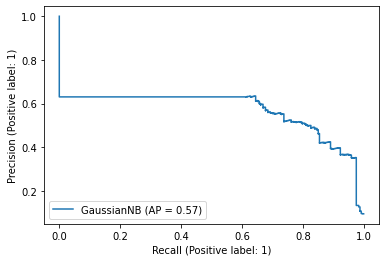

In [43]:
fprs,tprs=[],[]
for name,clf in zip(names,classifiers):
    print("\nTesting Classifier ",name)
    clf.fit(X_borderline, y_borderline)
    probs = clf.predict_proba(X_test)
    probs = probs [:,1]
    fpr, tpr, thr = roc_curve(y_test,probs)
    fprs.append(fpr)
    tprs.append(tpr)
    evaluateModel(clf)

Collective ROC Curve


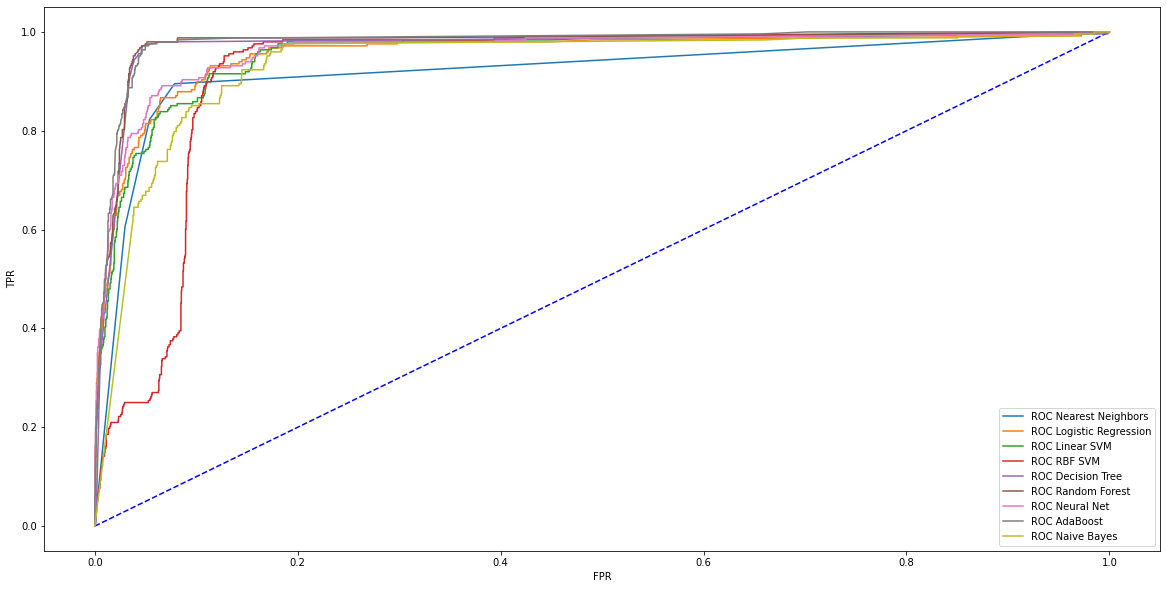

In [44]:
plot_roc_curve_many(fprs,tprs,names)

# **Hyperparameter Tuning of Random Forest**
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. 

In [45]:
rf = classifiers[5]
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


## RandomSearchCV

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [47]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, 
                               n_jobs = -1,scoring='f1')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    n_estimators=10,
                                                    random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},


In [48]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [49]:
# Make Random Forest with best found hyperparameters
rf_best = RandomForestClassifier(random_state=0, n_estimators =  1800, 
                                min_samples_split= 5, min_samples_leaf= 4, 
                                max_features= 'auto', max_depth= 10, 
                                bootstrap = False)


Classification Score 0.9651515151515152

ROC Score : 0.9810760330132701

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2392
           1       0.78      0.87      0.82       248

    accuracy                           0.97      2640
   macro avg       0.88      0.92      0.90      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2332   60]
 [  32  216]]

ROC Curve



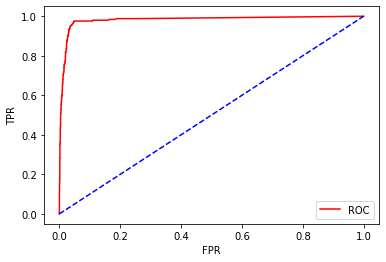


PR Curve



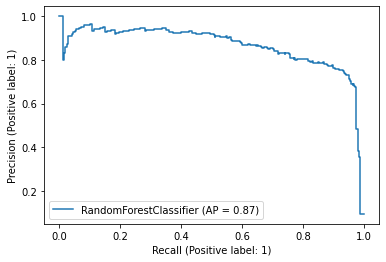

In [50]:
#Train and evaluate The original rf 
rf.fit(X_train,y_train)
evaluateModel(rf)


Classification Score 0.9659090909090909

ROC Score : 0.983071933326141

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2392
           1       0.79      0.87      0.83       248

    accuracy                           0.97      2640
   macro avg       0.89      0.92      0.90      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2334   58]
 [  32  216]]

ROC Curve



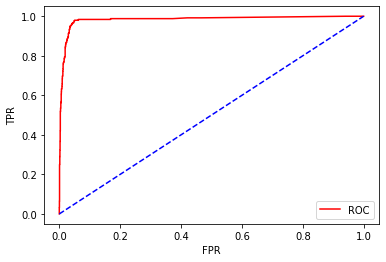


PR Curve



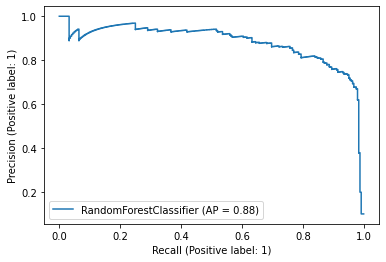

In [51]:
# train and evalute the best fit rf
rf_best.fit(X_train,y_train)
evaluateModel(rf_best)

# **GridSearchCV**
It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [53]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [10, 12, 14],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,2,3,4,5],
    'min_samples_split': [ 4,6,8,10],
    'n_estimators': [1800,1900,2000,2100]
}
# Create a based model
rf = classifiers[5]
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 5,scoring='f1')

In [54]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [10, 12, 14],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10],
                         'n_estimators': [1800, 1900, 2000, 2100]},
             scoring='f1', verbose=5)

In [55]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 2100}

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 2000}

# **Hyperparameter Tuning for KNN using gridSearchCV**

In [62]:
knn = classifiers[0]

In [63]:
params = {
        'n_neighbors' : [int(x) for x in range(2,8)],
        'weights': ['uniform','distance'],
        'algorithm': ['auto','ball_tree','kd_tree','brute'],
               
}
grid_knn = GridSearchCV(estimator=knn,
                       param_grid=params,
                        scoring='f1',cv=5,n_jobs=-1,verbose=1)


In [64]:
pprint(params)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'n_neighbors': [2, 3, 4, 5, 6, 7],
 'weights': ['uniform', 'distance']}


In [65]:
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [66]:
grid_knn.best_score_

0.7023365737234635

In [67]:
grid_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


Classification Score 0.9435606060606061

ROC Score : 0.9216988415686699

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2392
           1       0.74      0.62      0.67       248

    accuracy                           0.94      2640
   macro avg       0.85      0.80      0.82      2640
weighted avg       0.94      0.94      0.94      2640


Confusion Matrix

[[2338   54]
 [  95  153]]

ROC Curve



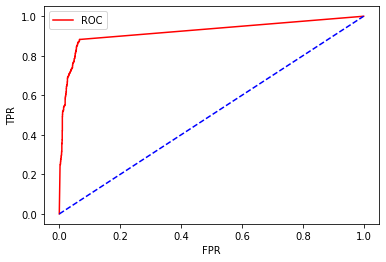


PR Curve



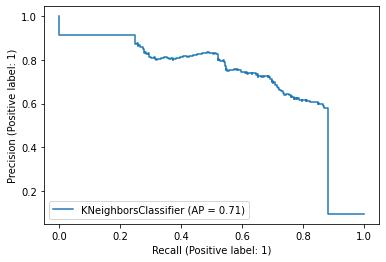

In [68]:
best_knn = grid_knn.best_estimator_
evaluateModel(best_knn)

# **Best Performing Algorithm**


Classification Score 0.9659090909090909

ROC Score : 0.9830500188801381

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2392
           1       0.79      0.88      0.83       248

    accuracy                           0.97      2640
   macro avg       0.89      0.93      0.90      2640
weighted avg       0.97      0.97      0.97      2640


Confusion Matrix

[[2333   59]
 [  31  217]]

ROC Curve



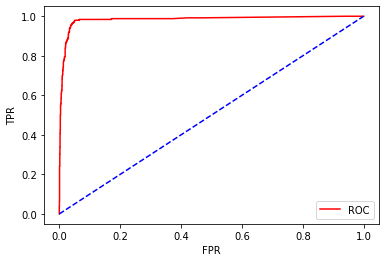


PR Curve



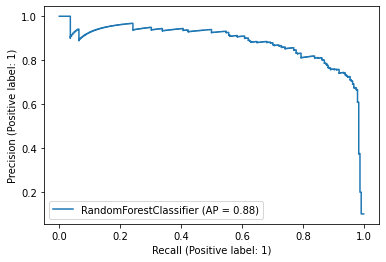

In [57]:
# Make Random Forest with best found hyperparameters
best_algo_rf = RandomForestClassifier(random_state=0, n_estimators =  2100, 
                                min_samples_split= 10, min_samples_leaf= 3, 
                                max_features= 'auto', max_depth= 10, 
                                bootstrap = False)
best_algo_rf.fit(X_train,y_train)
evaluateModel(best_algo_rf)

In [58]:
importances = pd.DataFrame({'feature':X_df.columns,'importance':np.round(best_algo_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [59]:
importances.head(10)

importance
feature                      
average sales           0.272
total_revenue           0.268
no_of_repair_jobs       0.132
no_of_customers         0.114
no_of_purchases         0.067
billing_cycle           0.055
tenure                  0.029
use_MobileSentrix       0.016
use_RepairDeskPay       0.011
use_PrintNode           0.007

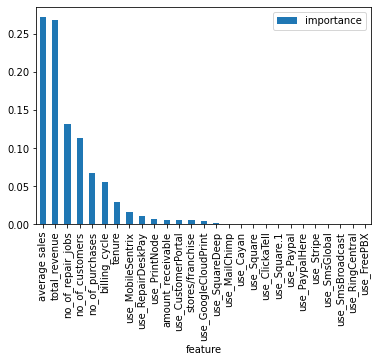

In [60]:
imp = importances.plot.bar()